<h1> Ping </h1>

![](Bildschirmfoto%202023-11-07%20um%2017.32.15.png)

<h2>Exercise 2.1.1</h2>

the ICMP packets that are sent when the ping command is executed are the "Echo (ping) request" packets. The responses from the target IP are the "Echo (ping) reply" packets. These packets can be identified in Wireshark with the protocol listed as ICMP and the info column indicating "Echo (ping) request" or "Echo (ping) reply" along with other details like the identifier and sequence number.

<h2>Exercise 2.1.2</h2>

The protocols used for transmitting these packets, are the Internet Control Message Protocol (ICMP) for the messages themselves, encapsulated within the Internet Protocol (IP) for routing and delivery across the network. Additionally, the data link layer is using the Ethernet protocol for the physical network communication. 

<h2>Exercise 2.1.3</h2>

![](Bildschirmfoto%202023-11-07%20um%2018.10.33.png)

Each pair of request and reply packets confirms a successful ping, with round-trip times listed, such as the 34.445 milliseconds in this capture. This time helps to measure the network latency between the two hosts.

<h2> Exercise 2.1.4 </h2>

```
ip.addr == 104.70.81.2 && icmp
```

This filter will display all ICMP traffic (which is used by the ping command) to and from the IP address 104.70.81.2.

<h2> Exercise 2.2.1 </h2>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
def plot_ping_output(region):
    file_path = 'latency_measurements/ping_output_' + region + '.txt'
    with open(file_path, 'r') as file:
        lines = file.readlines()
        time_values_from_file = np.array([float(line.split('time=')[1].split(' ')[0]) 
                                      for line in lines if "time=" in line])
    plt.figure(figsize=(15, 5))
    plt.plot(time_values_from_file, marker='o')
    plt.title('Ping Response Times for ' + region)
    plt.xlabel('Ping Sequence Number')
    plt.ylabel('Time (ms)')
    plt.grid(True)
    plt.show()
    print('mean latency for ' + region + ': ' + str(np.mean(time_values_from_file)) + "ms")

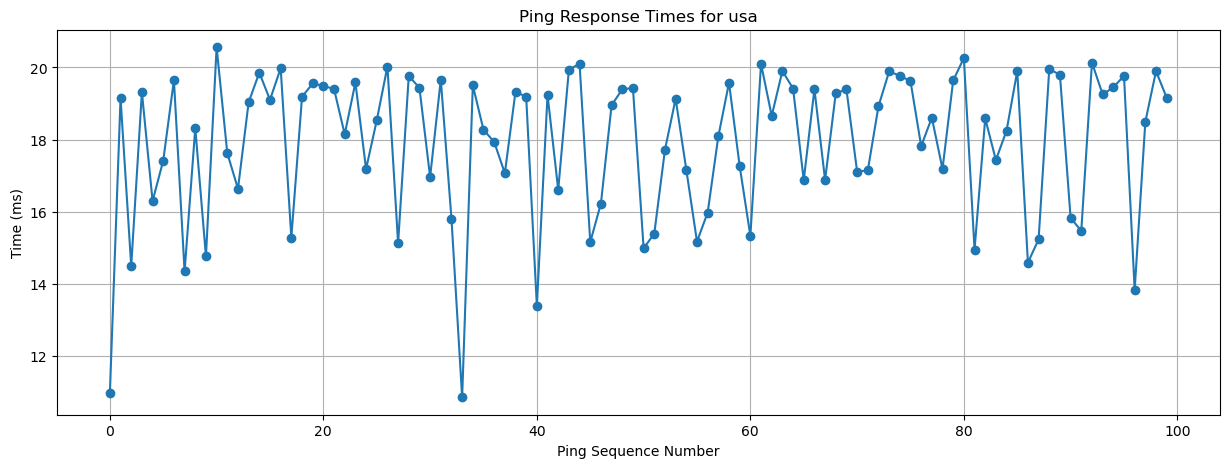

mean latency for usa: 17.92647ms


In [10]:
plot_ping_output('usa')

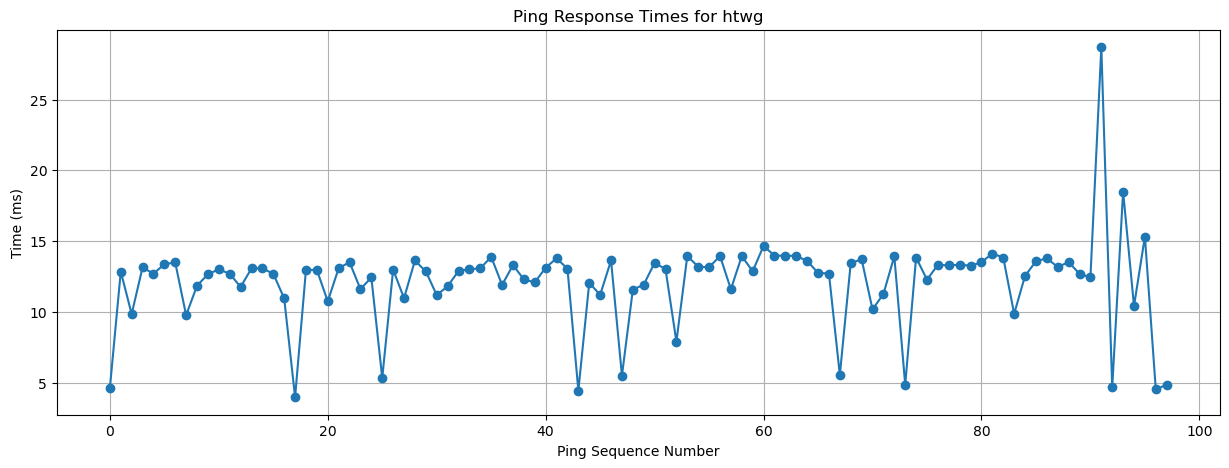

mean latency for htwg: 12.137020408163268ms


In [11]:
plot_ping_output('htwg')

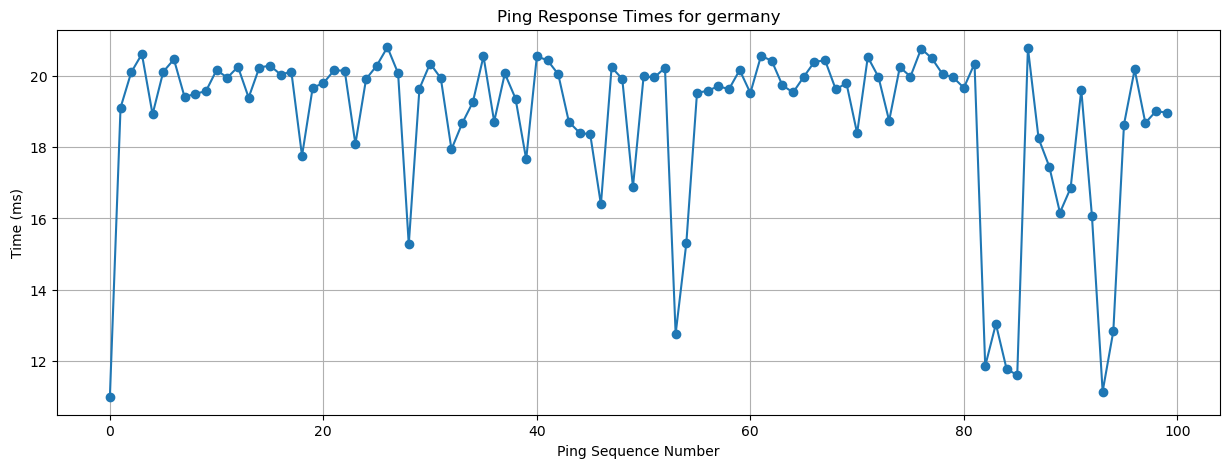

mean latency for germany: 18.82917ms


In [12]:
plot_ping_output('germany')

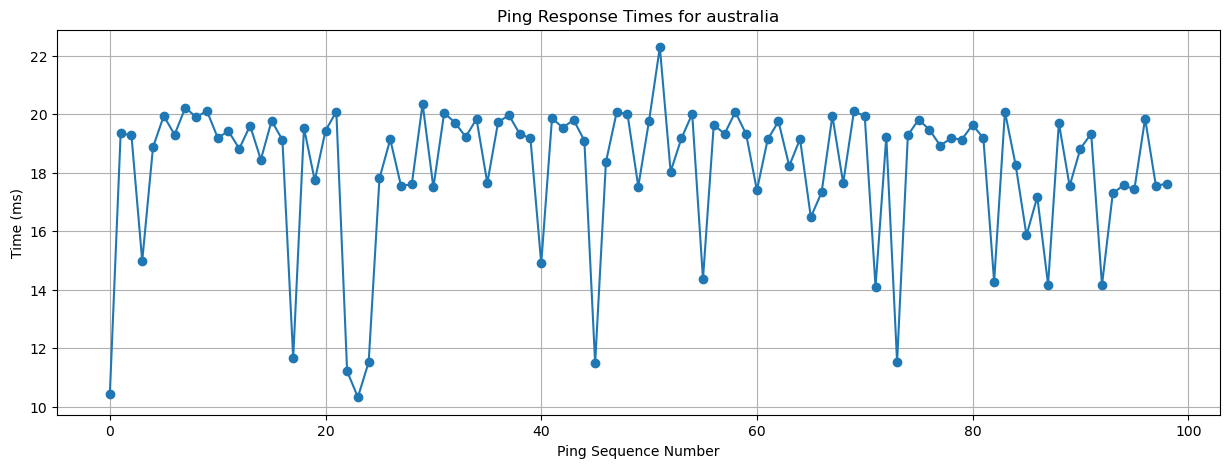

mean latency for australia: 18.151787878787882ms


In [13]:
plot_ping_output('australia')

<h2> Exercise 2.2.2 </h2>

In [14]:
packet_sizes = [100, 150, 200, 250, 300, 350, 400, 450, 500]
average_latencies = []
for i in packet_sizes:
    file_path = 'latency_measurements/ping_output_' + str(i) + '.txt'
    with open(file_path, 'r') as file:
        lines = file.readlines()
        time_values_from_file = np.array([float(line.split('time=')[1].split(' ')[0]) 
                                      for line in lines if "time=" in line])
        average_latencies.append(np.mean(time_values_from_file))

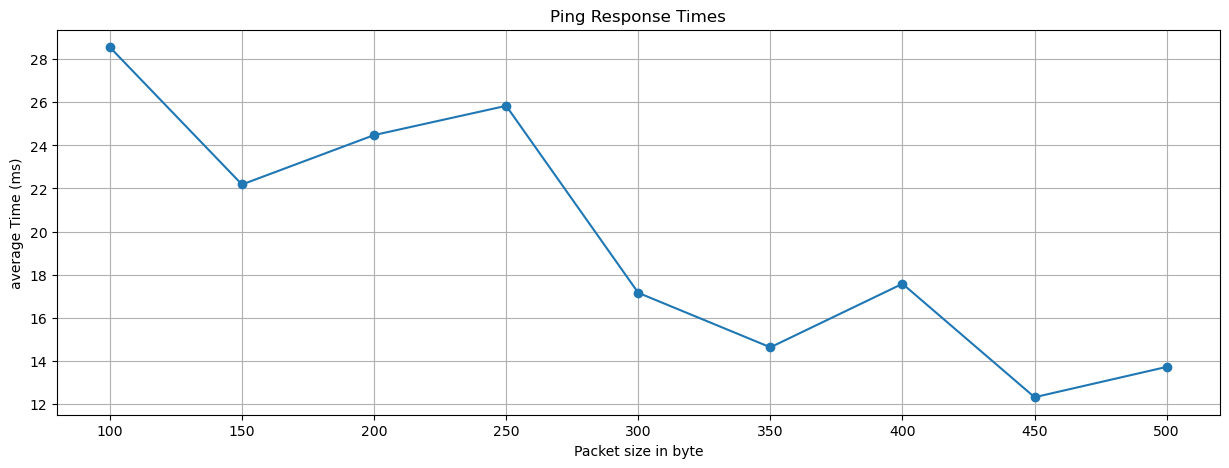

In [15]:
    plt.figure(figsize=(15, 5))
    plt.plot(packet_sizes, average_latencies, marker='o')
    plt.title('Ping Response Times')
    plt.xlabel('Packet size in byte')
    plt.ylabel('average Time (ms)')
    plt.grid(True)
    plt.show()

<h1> Traceroute </h1>

<h2> Exercise 3 </h2>

In [16]:
import folium
def draw_traceroute(locations):
    m = folium.Map(location=locations[0], zoom_start=2)
    for i in range(len(locations)-1):
        folium.PolyLine([locations[i], locations[i+1]], color="blue", weight=2.5, opacity=1).add_to(m)
    folium.Marker(locations[0], popup='Start', icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(locations[-1], popup='Target', icon=folium.Icon(color='red')).add_to(m)
    return m

<h3> From Dallas to Konstanz </h3>

<table>
  <tr>
    <th>hop</th>
    <th>rtt</th>
    <th>rtt</th>
    <th>rtt</th>
    <th>ip address</th>
    <th>fully qualified domain name</th>
    <th>asn</th>
  </tr>
  <tr>
    <td>1</td>
    <td>2</td>
    <td>2</td>
    <td>1</td>
    <td>169.254.158.58</td>
    <td></td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>4</td>
    <td>1</td>
    <td>169.48.118.158</td>
    <td>ae103.ppr02.dal13.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>169.48.118.138</td>
    <td>8a.76.30a9.ip4.static.sl-reverse.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>*</td>
    <td>*</td>
    <td>3</td>
    <td>169.45.18.42</td>
    <td>ae17.cbs02.dr01.dal04.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>54</td>
    <td>30</td>
    <td>*</td>
    <td>169.45.18.5</td>
    <td>ae2.cbs01.eq01.chi01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>44</td>
    <td>102</td>
    <td>44</td>
    <td>50.97.17.49</td>
    <td>ae0.cbs02.tl01.nyc01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>116</td>
    <td>*</td>
    <td>*</td>
    <td>169.45.19.47</td>
    <td>ae1.cbs01.tg01.lon01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>122</td>
    <td>122</td>
    <td>122</td>
    <td>50.97.19.190</td>
    <td>ae0.cbs01.xn01.fra01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>122</td>
    <td>122</td>
    <td>122</td>
    <td>169.45.18.167</td>
    <td>a7.12.2da9.ip4.static.sl-reverse.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>121</td>
    <td>121</td>
    <td>121</td>
    <td>80.81.192.222</td>
    <td>cr-fra2-be1.x-win.dfn.de</td>
    <td>DE-CIX Management GmbH</td>
  </tr>
  <tr>
    <td>11</td>
    <td>125</td>
    <td>125</td>
    <td>125</td>
    <td>129.143.58.153</td>
    <td>frb-rz-1-hu0-0-1-0.belwue.net</td>
    <td>Universitaet Stuttgart</td>
  </tr>
  <tr>
    <td>12</td>
    <td>127</td>
    <td>127</td>
    <td>127</td>
    <td>129.143.59.21</td>
    <td>frb-kg-1-te0-0-0-6.belwue.net</td>
    <td>Universitaet Stuttgart</td>
  </tr>
  <tr>
    <td>13</td>
    <td>128</td>
    <td>128</td>
    <td>128</td>
    <td>129.143.59.18</td>
    <td>loe-dhbw-1-te0-1-0.belwue.net</td>
    <td>Universitaet Stuttgart</td>
  </tr>
  <tr>
    <td>14</td>
    <td>130</td>
    <td>130</td>
    <td>130</td>
    <td>129.143.59.13</td>
    <td>kon-rz-1-te0-0-0-13.belwue.net</td>
    <td>Universitaet Stuttgart</td>
  </tr>
  <tr>
    <td>15</td>
    <td>128</td>
    <td>*</td>
    <td>*</td>
    <td>129.143.47.226</td>
    <td></td>
    <td>Universitaet Stuttgart</td>
  </tr>
  <tr>
    <td>16</td>
    <td>130</td>
    <td>130</td>
    <td>130</td>
    <td>141.37.20.17</td>
    <td>cmssrv6.htwg-konstanz.de</td>
    <td>Universitaet Stuttgart</td>
  </tr>
</table>



In [17]:
locations = [
    (32.78306, -96.8065),
    (41.875772, -87.620606),
    (40.713192, -74.006065),
    (51.50853, -0.12574),
    (50.1109, 8.6820),
    (47.9990, 7.8421),
    (47.6169191, 7.6709248),
    (47.6779, 9.1732)
]
draw_traceroute(locations)

<h3> From Dallas to Schaffhausen </h3>

<table border="1">
  <tr>
    <th>hop</th>
    <th>rtt1</th>
    <th>rtt2</th>
    <th>rtt3</th>
    <th>ip address</th>
    <th>fully qualified domain name</th>
    <th>asn</th>
  </tr>
  <tr>
    <td>1</td>
    <td>3</td>
    <td>1</td>
    <td>1</td>
    <td>169.254.158.58</td>
    <td></td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>169.48.118.160</td>
    <td>ae103.ppr03.dal13.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>169.48.118.140</td>
    <td>8c.76.30a9.ip4.static.sl-reverse.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>3</td>
    <td>*</td>
    <td>3</td>
    <td>169.45.18.42</td>
    <td>ae17.cbs02.dr01.dal04.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>27</td>
    <td>25</td>
    <td>25</td>
    <td>169.45.18.5</td>
    <td>ae2.cbs01.eq01.chi01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>46</td>
    <td>46</td>
    <td>*</td>
    <td>50.97.17.49</td>
    <td>ae0.cbs02.tl01.nyc01.networklayer.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>8</td>
    <td>111</td>
    <td>111</td>
    <td>111</td>
    <td>169.45.18.13</td>
    <td>d.12.2da9.ip4.static.sl-reverse.com</td>
    <td>SoftLayer Technologies Inc.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>10</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>11</td>
    <td>135</td>
    <td>135</td>
    <td>135</td>
    <td>84.116.134.134</td>
    <td>fr-par02b-rd1-ae-11-0.aorta.net</td>
    <td>Liberty Global B.V.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>136</td>
    <td>135</td>
    <td>135</td>
    <td>84.116.130.226</td>
    <td>ch-nax01a-rc1-ae-10-0.aorta.net</td>
    <td>Liberty Global B.V.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>136</td>
    <td>136</td>
    <td>136</td>
    <td>84.116.133.154</td>
    <td>ch-gva01a-ri1-ae-0-0.aorta.net</td>
    <td>Liberty Global B.V.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>135</td>
    <td>135</td>
    <td>135</td>
    <td>212.161.215.62</td>
    <td></td>
    <td>Sunrise GmbH</td>
  </tr>
  <tr>
    <td>15</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>16</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>17</td>
    <td>132</td>
    <td>132</td>
    <td>132</td>
    <td>212.161.247.131</td>
    <td>zur01pe20.100ge3-0-0.bb.sunrise.net</td>
    <td>Sunrise GmbH</td>
  </tr>
  <tr>
    <td>18</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>19</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>20</td>
    <td>*</td>
    <td>*</td>
    <td>*</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>21</td>
    <td>135</td>
    <td>134</td>
    <td>134</td>
    <td>188.155.170.162</td>
    <td>xdsl-188-155-170-162.adslplus.ch</td>
    <td>Sunrise GmbH</td>
  </tr>
</table>


In [18]:
locations = [
    (32.78306, -96.8065),
    (41.875772, -87.620606),
    (40.713192, -74.006065),
    (51.50853, -0.12574),
    (48.859078, 2.293486),
    (46.202102, 6.14588),
    (47.366825, 8.54979),
    (47.47333, 8.30592)
]
draw_traceroute(locations)

<h3> From Dallas to Palo Alto (Google.com)</h3>

In [19]:
locations = [
    (32.78306, -96.8065),
    (37.33939, -121.89496),
    (37.405992, -122.078515)
]
draw_traceroute(locations)

<h3> From Dallas to Nagoya, Japan </h2>

In [20]:
locations = [
    (32.78306, -96.8065),
    (34.0526, -118.2439),
    (35.69156, 139.76755),
    (34.6937, 135.5022),
    (35.1815, 136.9064),
]
draw_traceroute(locations)

<h1> Network Latency </h1>

<h2> Exercise 4 </h2>

<h3> 4.1 <h3>

Router: Equinix Singapore (SG1),  Interxion Paris 2, Equinix Los Angeles (LA1)

![](LookingGlas.png)


Connection between Singapore and Frankfurt: based on the displayed hops starting from hop 3, suggests that the initial hops possible be a network switch, and the second hop could be a route to Marseille, eventually connecting to Frankfurt from there.

<h3> 4.2 <h3>

**One-Way-Delay:** können in den Entsprechenden Zeilen im Bild oben abgelesen werden

<h3> 4.3 <h3>

In [22]:
Speed_of_light             = 1_079_252_000  # km/h
Straight_line_distance     = 11_301.68      # km

Minimal_speed              = Straight_line_distance / Speed_of_light  # hours
Minimal_speed_ms           = Minimal_speed * 3600000

Required_speed             = 856295          # m/s

print("Minimal Speed: " + str(Minimal_speed) + "h")
print("Minimal Speed: " + str(Minimal_speed_ms) + "ms")
print("Required Speed: " + str(Required_speed) + "ms")
print("Difference: " + str((Required_speed - Minimal_speed_ms)) + "ms")


Minimal Speed: 1.0471771189675813e-05h
Minimal Speed: 37.698376282832925ms
Required Speed: 856295ms
Difference: 856257.3016237172ms



<h3>Causes for Delay<h3>
Routing Decisions:
Packets may not take the direct route but might be routed through various network nodes due to routing decisions, resulting in additional delays.

Network Congestion: Congestion or overloads in specific network segments can lead to delays as packets have to wait for processing.

Quality of Transmission Media: The physical media through which data is transmitted can cause signal losses or delays.

Processing Times at Routers: The time a router takes to process and forward packets also contributes to the overall delay.